In [2]:
from mlwpy import *
%matplotlib inline

In [3]:
np.random.randint(1,7)

4

In [4]:
few_rolls = np.random.randint(1,7,size=10)
many_rolls = np.random.randint(1,7,size=1000)

<BarContainer object of 6 artists>

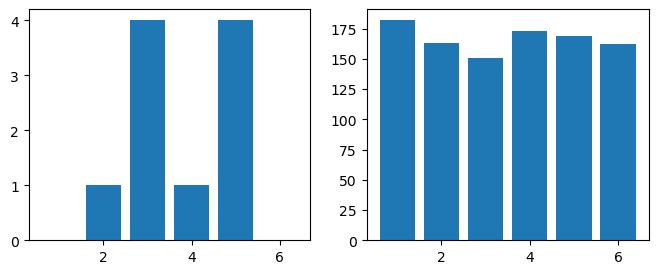

In [5]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5,7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5,7.5))[0]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
ax1.bar(np.arange(1,7),few_counts)
ax2.bar(np.arange(1,7),many_counts)

(0.0, 55.0)

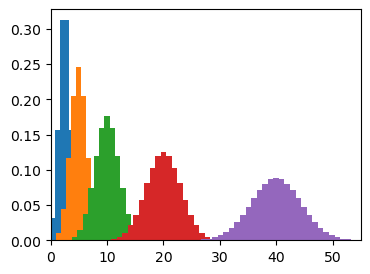

In [6]:
import scipy.stats as ss

b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
#binomial with .5 is result of many coin flips
 success = np.arange(flips)
 our_distribution = b.pmf(success,flips, .5)
 plt.hist(success, flips, weights = our_distribution)
plt.xlim(0,55)

(0.0, 55.0)

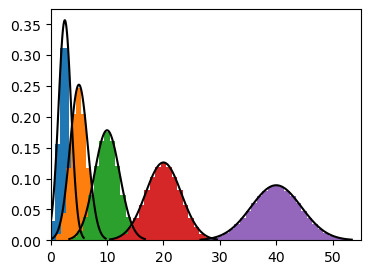

In [7]:
b = ss.distributions.binom
n = ss.distributions.norm
for flips in [5,10,20,40,80]:
#binomial coin flips 
   success = np.arange(flips)
   our_distribution = b.pmf(success,flips,0.5)
   plt.hist(success,flips,weights = our_distribution)

   #normal approximation to that binomial
   #we have to set the mean and the standard deviation
   mu = flips * .5
   std_dev = np.sqrt(flips * .5 * (1- .5))

   #we have to set up bothe the x and y points for the normal
   #we get the ys fromt the distribution (a function)
   #we have to feed it xs , we set those up here
   norm_x= np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
   norm_y=n.pdf(norm_x,mu,std_dev)
   plt.plot(norm_x,norm_y,'k');

plt.xlim(0,55)

In [8]:
#in pure old school python 
quantity = [2,12,3]
costs = [12.5,.5,1.75]
partial_cost = []
for q,c in zip(quantity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

36.25

In [9]:
#in pure python for new school kids
quantity= [2,12,3]
costs = [12.5,.5,1.75]
sum(q*c for q,c in zip(quantity,costs))

36.25

In [10]:
#using numpy
quantity = np.array([2,12,3])
costs = np.array([12.5,.5,1.75])
sum(quantity * costs )

36.25

In [11]:
values = np.array([10.0,20.0,30.0])
weights = np.full_like(values,1/3) #repeated (1/3)

print("weights:", weights)
print("via mean",np.mean(values))
print("via weights and dot products",np.dot(weights,values))

weights: [0.3333 0.3333 0.3333]
via mean 20.0
via weights and dot products 20.0


In [12]:
values = np.array([10.0,20.0,30.0])
weights = np.array([.5,.25,.25])

np.dot(weights, values)


17.5

In [13]:
         #odd,even
payoffs = np.array([1,-.5])
probs = np.array([.5,.5])
np.dot(payoffs,probs)

0.25

In [14]:
def is_even(n):
    # if remainder is 0, value is even
    return n % 2 == 0

winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -.5
print(winnings)

2542.0


In [15]:
values = np.array([5,-3,2,1])
squares = values * values
print(squares,
      np.sum(squares),
      np.dot(values, values), sep="\n")

[25  9  4  1]
39
39


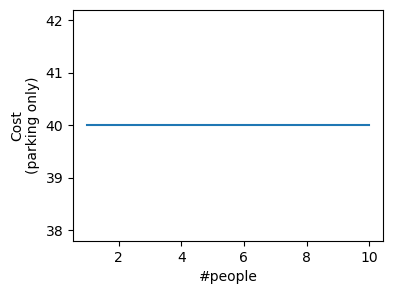

In [16]:
import numpy as np

people = np.arange(1, 11)
total_cost = np.ones_like(people)*40.0

ax = plt.gca()

ax.plot(people,total_cost)
ax.set_xlabel("#people")
ax.set_ylabel("Cost\n(parking only)");

In [17]:
people = np.arange(1,11)
total_cost = 80* people + 40
#.T transpose to save vertical spaces in printout
display(pd.DataFrame({'total cost':total_cost.astype(np.int64)},index=people).T)

,1,2,3,4,5,6,7,8,9,10
total cost,120,200,280,360,440,520,600,680,760,840


Text(0, 0.5, 'total cost')

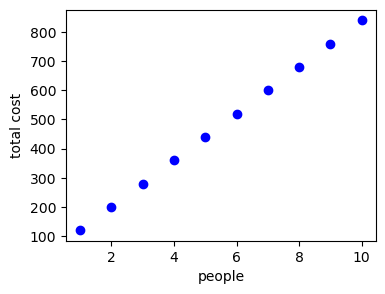

In [18]:
ax = plt.gca()
ax.plot(people,total_cost,'bo')
ax.set_ylabel("Total cost")
ax.set_xlabel("people")
ax.set_ylabel("total cost")

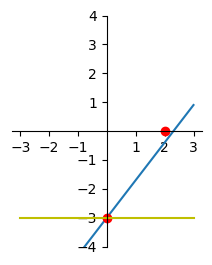

In [19]:
#paint by number
#create 100 x values between -3,3
xs = np.linspace(-3 ,3, 100)

m,b=1.3,-3

ax = plt.gca()

ys=m* xs + b
ax.plot(xs,ys)

ax.set_ylim(-4,4)
high_school_style(ax)

ax.plot(0 , -3 , 'ro')
ax.plot(2 , 0 , 'ro')

ys=0*xs + b
ax.plot(xs,ys , 'y')

In [20]:
#np.c_[] lets create an array column  by column
xs=np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]

#view the first few rows
display(pd.DataFrame(xs_p1).head())

,0,1
0,-3.0000,1.0000
1,-2.9394,1.0000
2,-2.8788,1.0000
3,-2.8182,1.0000
4,-2.7576,1.0000


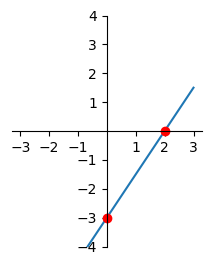

In [21]:
w=np.array([1.5,-3])
ys=np.dot(xs_p1,w)

ax = plt.gca()
ax.plot(xs,ys)

#styling 
ax.set_ylim(-4 ,4)
high_school_style(ax)

ax.plot(0, -3 , 'ro')
ax.plot(2, 0 , 'ro')



In [22]:
number_people = np.arange(1,11)
number_rbs = np.arange(0,20)

#numpy too to get cross-product of values(each against each)
#in two paired arrays. try it out: np.meshgrid([0,1],[10,20])
#'perfect* for functions of multiple variables 

number_people, number_rbs = np.meshgrid(number_people, number_rbs)
total_cost = 80 * number_people + 10 * number_rbs


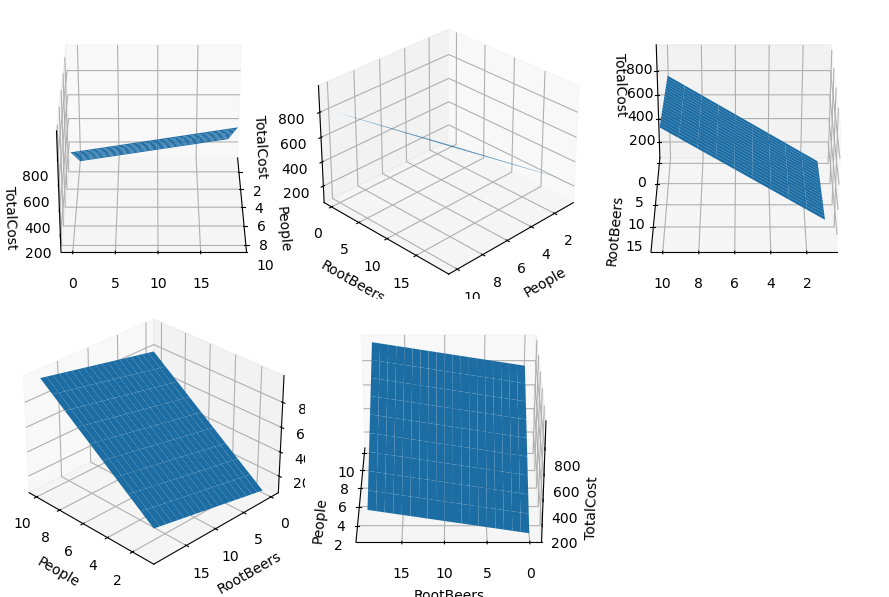

In [23]:
#import needed for 'projection':'3d'
from mpl_toolkits.mplot3d import Axes3D
fig,axes = plt.subplots(2,3, subplot_kw = {'projection':'3d'}, figsize = (9,6))

angles = [0,45,90,135,180]
for ax, angle in zip(axes.flat, angles):
    ax.plot_surface(number_people,number_rbs, total_cost)
    ax.set_xlabel("People")
    ax.set_ylabel("RootBeers")
    ax.set_zlabel("TotalCost")
    ax.azim = angle

#we don't use the last axis
axes.flat[-1].axis('off')
fig.tight_layout()

In [24]:
number_people = np.array([2,3])
number_rbs = np.array([0,1,2])
number_hotdogs = np.array([2,4])

costs= np.array([80,10,5])

columns = ["people","RootBeer","HotDogs","TotalCost"]

In [25]:
counts = np_cartesian_product(number_people, number_rbs, number_hotdogs)
print(counts)

totals = (costs[0] * counts[:,0]+costs[1] * counts[:,1]+costs[2] * counts[:,2]+  40 )
display(pd.DataFrame(np.c_[counts,totals], columns = columns).head(8))

[[2 0 2]
 [2 0 4]
 [3 0 2]
 [3 0 4]
 [2 1 2]
 [2 1 4]
 [3 1 2]
 [3 1 4]
 [2 2 2]
 [2 2 4]
 [3 2 2]
 [3 2 4]]


,people,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


In [26]:
totals = np.dot(counts,costs)+40
display(pd.DataFrame(np.c_[counts,totals], columns = columns).head(8))

,people,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


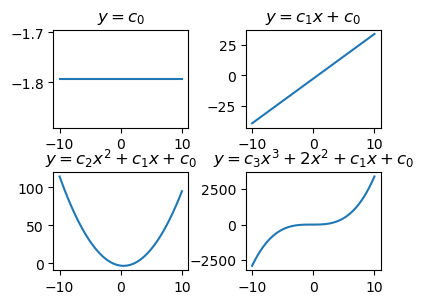

In [27]:
fig,axes = plt.subplots(2,2)
fig.tight_layout()

titles = ["$y=c_0$",
          "$y=c_1x + c_0$",
          "$y=c_2x^2 + c_1x + c_0$",
          "$y=c_3x^3+2x^2 + c_1x + c_0$"
]
xs = np.linspace(-10,10,100)
for power, (ax, title) in enumerate(zip(axes.flat, titles),1):
    coeffs = np.random.uniform(-5,5,power)
    poly =np.poly1d(coeffs)
    ax.plot(xs,poly(xs))
    ax.set_title(title)

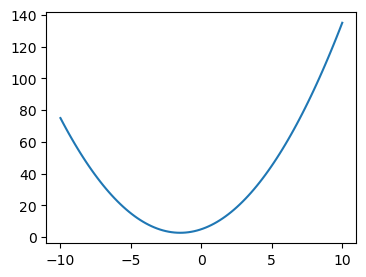

In [28]:
plt.Figure((2,1.5))
xs = np.linspace(-10,10,100)
coeffs = np.array([1,3,5])
ys = np.dot(coeffs,[xs**2,xs**1,xs**0])
plt.plot(xs,ys)


In [29]:
row_vec = np.arange(5).reshape(1,5)
col_vec = np.arange(0,50,10).reshape(5,1)
print(
    "row_vec:",row_vec,
    "col_vec:",col_vec,
    "their dot product:", np.dot(col_vec, row_vec), sep='\n'
)

row_vec:
[[0 1 2 3 4]]
col_vec:
[[ 0]
 [10]
 [20]
 [30]
 [40]]
their dot product:
[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


In [30]:
row_vec = np.arange(5).reshape(1,5)
col_vec = np.arange(0,50,10).reshape(5,1)

oned_vec = np.arange(5)

np.dot(oned_vec,col_vec)

array([300])

In [31]:
try: np.dot(col_vec,oned_vec)
except ValueError as e:
    print("I went boom",e)

I went boom shapes (5,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)


In [37]:
example_oned = np.arange(4)
print(example_oned.shape)
transpose_array = example_oned.T
print(transpose_array.shape)

(4,)
(4,)


In [38]:
example_one2d = np.arange(0,4).reshape(2,2)
print(example_one2d.shape)
transpose_array = example_one2d.T
print(transpose_array.shape)

(2, 2)
(2, 2)


In [39]:
1.1 + 2.2 == 3.3

False

In [40]:
np.allclose(1.1+2.2,3.3)

True